In [14]:
import numpy as np
import os
from scipy.misc import imread
import pickle
import sys
sys.path.append(r'I:\Workplace\PycharmProjects\cs231n')
def load_CIFAR_batch(filename):

    with open(filename,'rb') as f:
        datadict= pickle.load(f,encoding='bytes')
        X=datadict[b'data']
        Y=datadict[b'labels']
        X=X.reshape(10000,3,32,32).transpose(0,2,3,1).astype("float")
        Y=np.array(Y)
        return X,Y

def load_CIFAR10(root):

    xs=[]
    ys=[]
    for b in range(1,6):
        f=os.path.join(root,'data_batch_%d'%(b,))
        X,Y=load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr=np.concatenate(xs)
    Ytr=np.concatenate(ys)
    del X,Y
    Xte,Yte=load_CIFAR_batch(os.path.join(root,'test_batch'))
    return Xtr,Ytr,Xte,Yte

In [15]:
import random
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize']=(10.0,8.0)
plt.rcParams['image.interpolation']='nearest'
plt.rcParams['image.cmap']='gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
cifar10_dir = 'I:\Workplace\PycharmProjects\cs231n\Assignment1\cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)


Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [17]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [18]:
# Split the data into train, val, and test sets. In addition we will
# create a small development set as a subset of the training data;
# we can use this for development so our code runs faster.
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500
()
# Our validation set will be num_validation points from the original
# training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We will also make a development set, which is a small subset of
# the training set.
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)


Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [19]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)
print('dev data shape: ', X_dev.shape)


Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (1000, 3072)
dev data shape:  (500, 3072)


[ 130.64189796  135.98173469  132.47391837  130.05569388  135.34804082
  131.75402041  130.96055102  136.14328571  132.47636735  131.48467347]


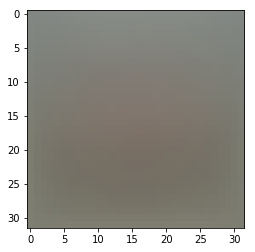

In [20]:
mean_image=np.mean(X_train,axis=0)
print(mean_image[:10])
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8'))
plt.show()


In [21]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)
print('dev data shape: ', X_dev.shape)


Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (1000, 3072)
dev data shape:  (500, 3072)


In [22]:
# second: subtract the mean image from train and test data
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

In [23]:


# third: append the bias dimension of ones (i.e. bias trick) so that our SVM
# only has to worry about optimizing a single weight matrix W.
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)


(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


In [24]:
from Assignment1.classifiers.linear_svm import svm_loss_naive
import time

W=np.random.rand(3073,10)*0.00001
loss,grad=svm_loss_naive(W,X_dev,y_dev,0.00001)
print('loss :',loss)

loss : 9.00891671727


In [25]:
from Assignment1.gradient_check import grad_check_sparse

loss,grad=svm_loss_naive(W,X_dev,y_dev,0.0)

f=lambda w:svm_loss_naive(w,X_dev,y_dev,0.0)[0]
grad_numerical=grad_check_sparse(f,W,grad)

loss,grad=svm_loss_naive(W,X_dev,y_dev,1e2)
f=lambda w:svm_loss_naive(w,X_dev,y_dev,1e2)[0]
grad_numerical=grad_check_sparse(f,W,grad)


numerical: 5.154553 analytic: 5.154553, relative error: 4.481942e-12


numerical: -54.408522 analytic: -54.408522, relative error: 3.265307e-12


numerical: -1.501377 analytic: -1.501377, relative error: 6.550771e-11


numerical: -4.499740 analytic: -4.499740, relative error: 5.596064e-11


numerical: 29.273160 analytic: 29.273160, relative error: 4.716152e-12


numerical: -26.183903 analytic: -26.183903, relative error: 9.914162e-12


numerical: 53.950558 analytic: 53.950558, relative error: 8.517864e-13


numerical: -5.499687 analytic: -5.499687, relative error: 1.550400e-10


numerical: 9.000424 analytic: 9.000424, relative error: 6.881203e-11


numerical: 18.417069 analytic: 18.417069, relative error: 1.052837e-11


numerical: 13.411148 analytic: 13.411148, relative error: 1.182554e-11


numerical: 16.409688 analytic: 16.409688, relative error: 8.890180e-12


numerical: -29.265418 analytic: -29.265418, relative error: 9.139260e-12


numerical: 6.457224 analytic: 6.457224, relative error: 2.790918e-12


numerical: 22.763576 analytic: 22.763576, relative error: 6.427669e-12


numerical: 14.150662 analytic: 14.150662, relative error: 1.902433e-11


numerical: 29.498732 analytic: 29.498732, relative error: 6.428099e-12


numerical: 19.943752 analytic: 19.943752, relative error: 4.653553e-12


numerical: -8.151649 analytic: -8.151649, relative error: 1.936970e-11


numerical: -41.362279 analytic: -41.362279, relative error: 7.993079e-12


In [42]:
tic = time.time()
loss_naive, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.00001)
toc = time.time()
print('Naive loss : %e in %f s' % (loss_naive, toc - tic))

tic = time.time()
loss_vectorized, _ = svm_loss_vectorized(W, X_dev, y_dev, 0.00001)
toc = time.time()
print('Vectorzed loss : %e in %f s' % (loss_vectorized, toc - tic))

print('Difference: ', loss_naive - loss_vectorized)

Naive loss : 9.008670e+00 in 0.150109 s
Vectorzed loss : 9.008670e+00 in 0.006006 s
Difference:  -2.48689957516e-14


In [43]:
from Assignment1.classifiers.linear_svm import svm_loss_vectorized

tic = time.time()
_, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.00001)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_dev, y_dev, 0.00001)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

Naive loss and gradient: computed in 0.149115s
Vectorized loss and gradient: computed in 0.006010s
difference: 0.000000


In [44]:
from Assignment1.classifiers.linear_classifier import LinearSVM

svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7,
                      reg=5e4, num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500 : loss 795.629641


iteration 100 / 1500 : loss 287.517457


iteration 200 / 1500 : loss 108.046523


iteration 300 / 1500 : loss 43.214398


iteration 400 / 1500 : loss 19.634849


iteration 500 / 1500 : loss 10.081620


iteration 600 / 1500 : loss 6.499720


iteration 700 / 1500 : loss 5.744879


iteration 800 / 1500 : loss 5.539310


iteration 900 / 1500 : loss 5.549672


iteration 1000 / 1500 : loss 5.851633


iteration 1100 / 1500 : loss 5.376331


iteration 1200 / 1500 : loss 5.263820


iteration 1300 / 1500 : loss 5.161721


iteration 1400 / 1500 : loss 5.415106


That took 10.739678s


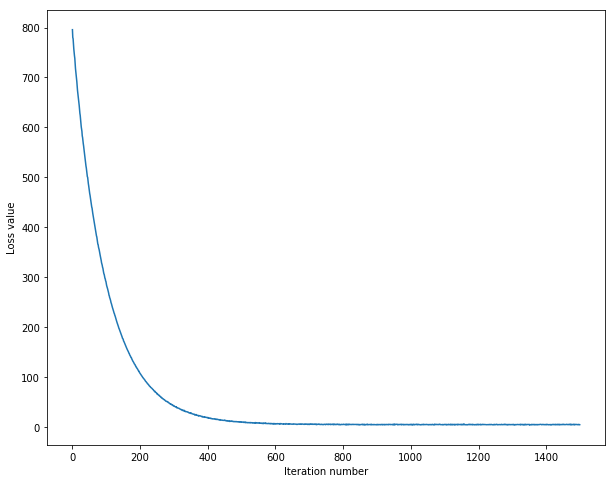

In [45]:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [46]:
y_train_pred = svm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred)))
y_val_pred = svm.predict(X_val)
print('validation accuracy : %f' % (np.mean(y_val == y_val_pred)))

training accuracy: 0.371204
validation accuracy : 0.376000


In [47]:
learning_rates = [1e-7, 5e-6]
regularization_strengths = [5e4, 1e5]
results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.
# The LinearSVM object that achieved the highest validation rate.
best_svm = None

for lr in learning_rates:
    for rs in regularization_strengths:
        svm = LinearSVM()
        loss_hist = svm.train(X_train, y_train, learning_rate=lr, reg=rs,
                              num_iters=1500, verbose=True)
        y_train_pred = svm.predict(X_train)
        train_acc = np.mean(y_train == y_train_pred)
        y_val_pred = svm.predict(X_val)
        val_acc = np.mean(y_val == y_val_pred)

        results[(lr, rs)] = (train_acc, val_acc)

        if val_acc > best_val:
            best_val = val_acc
            best_svm = svm

for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
        lr, reg, train_accuracy, val_accuracy))

print('best validation accuracy achieved during cross-validation: %f' % best_val)

iteration 0 / 1500 : loss 793.857091


iteration 100 / 1500 : loss 289.939931


iteration 200 / 1500 : loss 108.674080


iteration 300 / 1500 : loss 42.670256


iteration 400 / 1500 : loss 19.027966


iteration 500 / 1500 : loss 9.926781


iteration 600 / 1500 : loss 7.891598


iteration 700 / 1500 : loss 6.493447


iteration 800 / 1500 : loss 5.879576


iteration 900 / 1500 : loss 5.516677


iteration 1000 / 1500 : loss 4.714069


iteration 1100 / 1500 : loss 5.711857


iteration 1200 / 1500 : loss 4.945551


iteration 1300 / 1500 : loss 5.701034


iteration 1400 / 1500 : loss 5.259226


iteration 0 / 1500 : loss 1555.029091


iteration 100 / 1500 : loss 210.590087


iteration 200 / 1500 : loss 32.980031


iteration 300 / 1500 : loss 9.466492


iteration 400 / 1500 : loss 5.999910


iteration 500 / 1500 : loss 5.502340


iteration 600 / 1500 : loss 5.923369


iteration 700 / 1500 : loss 5.932643


iteration 800 / 1500 : loss 5.584189


iteration 900 / 1500 : loss 5.603725


iteration 1000 / 1500 : loss 5.530197


iteration 1100 / 1500 : loss 5.290173


iteration 1200 / 1500 : loss 5.770832


iteration 1300 / 1500 : loss 5.117270


iteration 1400 / 1500 : loss 6.101899


iteration 0 / 1500 : loss 792.523348


iteration 100 / 1500 : loss 37.943807


iteration 200 / 1500 : loss 25.902196


iteration 300 / 1500 : loss 18.267259


iteration 400 / 1500 : loss 23.273756


iteration 500 / 1500 : loss 25.068244


iteration 600 / 1500 : loss 32.158514


iteration 700 / 1500 : loss 18.392023


iteration 800 / 1500 : loss 26.857902


iteration 900 / 1500 : loss 17.715444


iteration 1000 / 1500 : loss 20.635243


iteration 1100 / 1500 : loss 25.623070


iteration 1200 / 1500 : loss 19.991514


iteration 1300 / 1500 : loss 25.909666


iteration 1400 / 1500 : loss 20.229596


iteration 0 / 1500 : loss 1556.412582


iteration 100 / 1500 : loss 32.584188


iteration 200 / 1500 : loss 33.144303


iteration 300 / 1500 : loss 22.590656


iteration 400 / 1500 : loss 45.958665


iteration 500 / 1500 : loss 32.142430


iteration 600 / 1500 : loss 38.430119


iteration 700 / 1500 : loss 30.520240


iteration 800 / 1500 : loss 32.802144


iteration 900 / 1500 : loss 24.089819


iteration 1000 / 1500 : loss 33.290727


iteration 1100 / 1500 : loss 37.289861


iteration 1200 / 1500 : loss 31.492697


iteration 1300 / 1500 : loss 36.163208


iteration 1400 / 1500 : loss 36.657422


lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.368551 val accuracy: 0.370000
lr 1.000000e-07 reg 1.000000e+05 train accuracy: 0.354531 val accuracy: 0.364000
lr 5.000000e-06 reg 5.000000e+04 train accuracy: 0.187694 val accuracy: 0.185000
lr 5.000000e-06 reg 1.000000e+05 train accuracy: 0.174755 val accuracy: 0.196000
best validation accuracy achieved during cross-validation: 0.370000


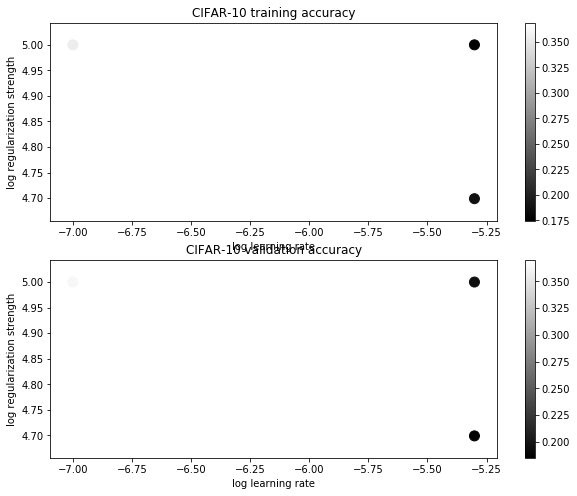

In [48]:
# Visualize the cross-validation results
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training accuracy')

# plot validation accuracy
colors = [results[x][1] for x in results]  # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()

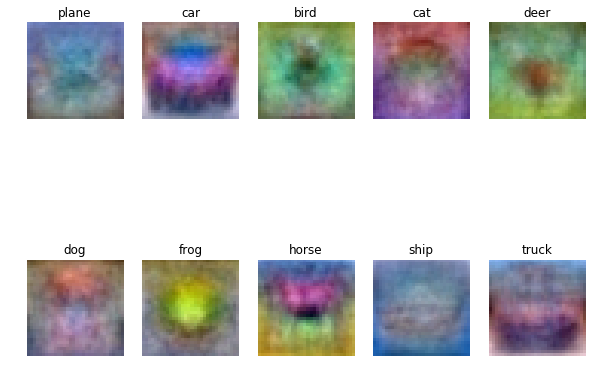

In [49]:
# Visualize the learned weights for each class.
# Depending on your choice of learning rate and regularization strength, these may
# or may not be nice to look at.
w = best_svm.W[:-1, :]  # strip out the bias
w = w.reshape(32, 32, 3, 10)
w_min, w_max = np.min(w), np.max(w)
classes = ['plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2, 5, i + 1)

    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])
